# Projeto e Análise de Algoritmos
## Avaliação Teórica de Algoritmos


Plot Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(graph):
    data = graph
    dim = len(data)
    fig, ax = plt.subplots(figsize=(dim, dim))
    
    ax.matshow(data, cmap='binary_r',  interpolation='nearest')
    
    for (i, j), z in np.ndenumerate(data):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.show()

### Floyd Warshall Algorithm

In [2]:
def floyd_warshall(graph):
    dist = graph
    # Number of vertices in the graph 
    V = len(graph)

    for k in range(V): 
        for i in range(V): 
            for j in range(V):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

### Dijkstra Algorithm

In [3]:
def min_distance(dist, queue):
    min_dist = float('inf')
    min_index = -1
    
    for i in range(len(dist)): 
        if dist[i] < min_dist and i in queue: 
            min_dist = dist[i] 
            min_index = i 
            
    return min_index

In [4]:
def dijkstra(source, graph): 
    V = len(graph)
    dist = [float('inf')] * V
    dist[source] = 0
    
    short_path = [-1] * V
    
    queue = [] 
    for i in range(V): 
        queue.append(i)
            
    while queue: 
        u = min_distance(dist, queue)  
        
        try:
            queue.remove(u)
        except:
            break

        for v in range(V): 
            if graph[u][v] and v in queue: 
                if dist[u] + graph[u][v] < dist[v]: 
                    dist[v] = dist[u] + graph[u][v] 
                    short_path[v] = u                        
    return dist

In [5]:
def n_djikstra(graph):
    dist_graph = list()
    for i in range(len(graph)):
        dist_graph.append(dijkstra(i, graph))

    return dist_graph

### Exemplo de execução

In [6]:
INF = float('inf')

graph = [
    [0,   5,    INF,  10], 
    [INF, 0,    3,    INF], 
    [INF, INF,  0,    1], 
    [INF, INF,  INF,  0] 
] 

floyd_warshall_graph = floyd_warshall(graph)
n_djikstra_graph = n_djikstra(graph)

In [7]:
floyd_warshall_graph == n_djikstra_graph

True

## Análise

### Execução

In [8]:
import random
import time
from datetime import datetime
import numpy as np
import math

# estrutura dos dados
size_time_data = list()
cols = ['size', 'floyd_time', 'djikstra_time']

# semente aleatoria
np.random.seed(42)

# menor valor numero de vertices
N = 1
# maior valor numero de vertices
M = 5

for i in range(N, M):
    
    # gera um grafo de n vertices
    graph = np.random.randint(i*5, size=(i*5, i*5))

    # atribui a diagonal, valores iguais a 0
    np.fill_diagonal(graph, 0)

    # floyd
    start_floyd = time.time()
    floyd_warshall(graph)
    end_floyd = time.time()

    delta_time_floyd = end_floyd - start_floyd

    # djikstra
    start_djikstra = time.time()
    n_djikstra(graph)
    end_djikstra = time.time()

    delta_time_djikstra = end_djikstra - start_djikstra

    size_time_data.append([i*5, delta_time_floyd, delta_time_djikstra])

    print('IT: ' + str(i) + ' : ' + str([i*5, delta_time_floyd, delta_time_djikstra]))    

IT: 1 : [5, 0.0028612613677978516, 0.004105806350708008]
IT: 2 : [10, 0.021740198135375977, 0.0262906551361084]
IT: 3 : [15, 0.06947636604309082, 0.06087446212768555]
IT: 4 : [20, 0.15857291221618652, 0.1600322723388672]


In [9]:
import pandas as pd

df_fl_dj = pd.DataFrame(size_time_data, columns=cols)

df_fl_dj.to_csv('time_execution_['+str(N)+' - '+str(M)+'].csv')
df_fl_dj.to_html('time_execution_['+str(N)+' - '+str(M)+'].html')

### Exibição dos dados

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('time_execution_[1 - 100].csv', index_col=0)

In [12]:
df.sample(7).sort_values(by='size')

,size,floyd_time,djikstra_time
34,175,7.484322,8.610443
36,185,8.802453,10.479988
38,195,10.026268,12.242806
51,260,24.232003,34.879626
72,365,68.267372,121.608824
75,380,75.090392,138.425215
94,475,147.833637,332.980330


In [13]:
df.tail().sort_values(by='size')

,size,floyd_time,djikstra_time
94,475,147.833637,332.980330
95,480,156.650149,346.771951
96,485,157.245955,344.317552
97,490,162.342923,373.094669
98,495,168.708185,391.868629


In [16]:
df_fl_dj = df

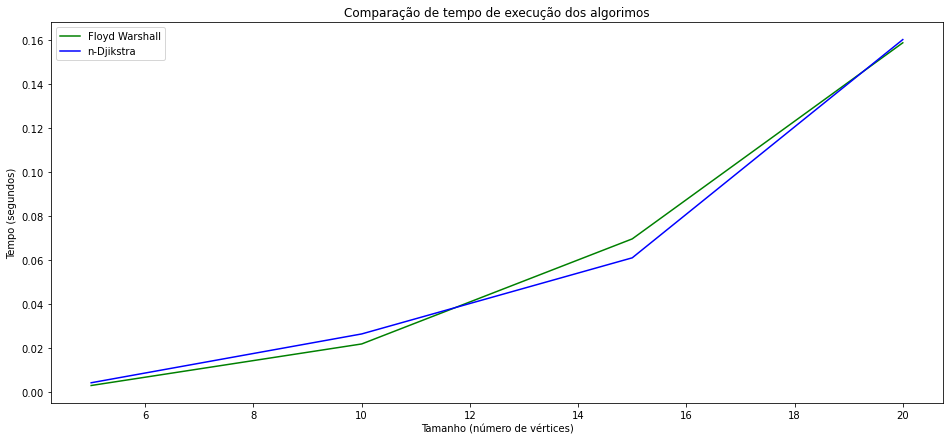

In [15]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

plt.figure(figsize=(16,7))

plt.title('Comparação de tempo de execução dos algorimos')

plt.plot(df_fl_dj['size'], df_fl_dj['floyd_time'], 
        color='green', linestyle='solid')

plt.plot(df_fl_dj['size'], df_fl_dj['djikstra_time'], 
        color='blue', linestyle='solid')


plt.xlabel('Tamanho (número de vértices)')
plt.ylabel('Tempo (segundos)')

plt.legend(['Floyd Warshall', 'n-Djikstra'])

plt.savefig('fld-dkt-t(n)-1-100.png')
plt.show()

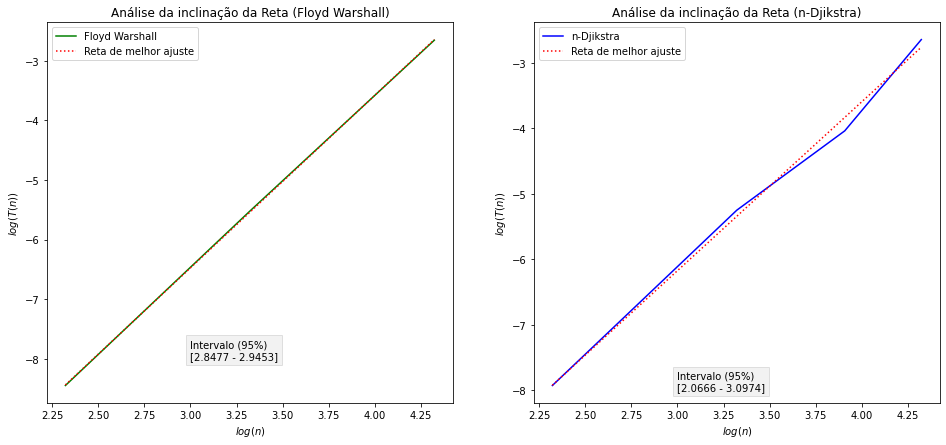

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import log
import numpy as np
import statsmodels.api as sm


lx = np.log2(df_fl_dj['size'])

lyd = np.log2(df_fl_dj['djikstra_time'])
lyf = np.log2(df_fl_dj['floyd_time'])

f_model = LinearRegression().fit(lx.values.reshape(-1,1), lyf.values)
d_model = LinearRegression().fit(lx.values.reshape(-1,1), lyd.values)

# Intervalo de confiabilidade
lx_stat = sm.add_constant(lx)
res_d = sm.OLS(lyd, lx_stat).fit()
res_f = sm.OLS(lyf, lx_stat).fit()

plt.figure(figsize=(16,7))

plt.subplot(121)

plt.title('Análise da inclinação da Reta (Floyd Warshall)')
plt.plot(lx, lyf, color='green', linestyle='solid')
plt.plot(lx, f_model.intercept_ + f_model.coef_ * lx, color='red', linestyle='dotted')

plt.xlabel('$log(n)$')
plt.ylabel('$log(T(n))$')

plt.legend(['Floyd Warshall', 'Reta de melhor ajuste'])
plt.text(3,-8, 'Intervalo (95%)\n['  + str('{:.4f}'.format(res_f.conf_int(0.05)[0][1])) + ' - ' 
                                + str('{:.4f}'.format(res_f.conf_int(0.05)[1][1])) + ']', 
         bbox=dict(facecolor='grey', alpha=0.1))

###

plt.subplot(122)

plt.title('Análise da inclinação da Reta (n-Djikstra)')
plt.plot(lx, lyd, color='blue', linestyle='solid')
plt.plot(lx, d_model.intercept_ + d_model.coef_ * lx, color='red', linestyle='dotted')

plt.xlabel('$log(n)$')
plt.ylabel('$log(T(n))$')

plt.legend(['n-Djikstra', 'Reta de melhor ajuste'])
plt.text(3,-8, 'Intervalo (95%)\n['  + str('{:.4f}'.format(res_d.conf_int(0.05)[0][1])) + ' - ' 
                                + str('{:.4f}'.format(res_d.conf_int(0.05)[1][1])) + ']', 
         bbox=dict(facecolor='grey', alpha=0.1))


plt.savefig('fld-dkt-slope-1-100.png')
plt.show()